 <font color="MediumOrchid">
<h3>Data Science with Python Career Program Capstone Project <br>

<h4><font color="Purple">
project Submission - (Rashmi sahani)<br><br>
Email: rashmisahani798@gmail.com<br><br>
Course: Data Science with Python Career Program (ChatGPT Included)

<font color="MediumOrchid">
<b>project overview : 

<font color="RebeccaPurple">

<b>Capstone Project: Car Price Prediction

This project aims to develop a machine learning model to predict the selling price of used<br>
cars based on various features such as the car's year, mileage, fuel type, transmission, and more.<br> 
The goal is to provide accurate price estimates that can help buyers and sellers make informed decisions.

<font color="RebeccaPurple">

<b>Problem Statement <br>

Perform EDA and derive insights from the CAR DETAILS dataset using various data analysis and data<br>
visualization libraries of Python, such as Pandas, Matplotlib, and Seaborn. Create and deploy an ML<br>
model which can be accessed by all, using Streamlit and GitHub.

<font color="RebeccaPurple">

<b>Introduction and Objectives<b><br>

The automotive market has seen a growing demand for used cars, driven by economic considerations and the availability of certified pre-owned programs. However, one of the most significant challenges faced by both buyers and sellers is determining the fair market value of a used car. The objective of this project is to build a machine learning model capable of predicting the selling price of used cars with high accuracy.

<b>Project Objectives
- To preprocess the dataset, including handling missing and duplicate values, encoding categorical variables, and scaling   numerical features.
- To perform exploratory data analysis (EDA) to identify patterns and insights.
- To build, train, and evaluate multiple regression models and select the best-performing model.
- To optimize the selected model using hyperparameter tuning techniques.
- To deploy the final model using Streamlit for real-time predictions.

<font color="MediumOrchid">

<b>steps <br><br>
    
<font color="RebeccaPurple">
    
1. Import necessary libraries & load the dataset<br><br>
    
2. Data Preprocessing <br>
   - Handling Null Values
   - Handling Duplicate Values
   - Data Type Checking and Conversion
   - Data Consistency Check
   - Feature Engineering
   - Encoding Categorical Data
   - Outlier Treatment
   - Data Scaling <br><br>
    
3. Exploratory Data Analysis (EDA)
    <br>
4. Model Building
    
   - Model Training and Evaluation
   - Hyperparameter Tuning
   - Model Retraining and Final Evaluation<br><br>
    
5. Model Deployment<br>
   - Saving the Model
   - Creating a Streamlit App<br><br>
   
6. Conclusion and Future Work<br><br>
    
7. References


<font color="MediumOrchid">

<b>Dataset Overview<br><br>

<font color="RebeccaPurple">

The dataset used in this project is titled "CAR DETAILS," which contains various features of used cars, including:
- Name: The brand and model of the car.
- Year: The year in which the car was purchased.
- Selling Price: The price at which the car is being sold (target variable).
- Present Price: The current ex-showroom price of the car.
- Kilometers Driven: The total distance the car has been driven in kilometers.
- Fuel Type: The type of fuel the car uses (Petrol, Diesel, CNG, etc.).
- Seller Type: Whether the seller is a dealer or an individual.
- Transmission: The type of transmission in the car (Manual or Automatic).
- Owner:The number of previous owners of the car.

<b>The dataset is publicly available and can be downloaded [CAR DETAILS DATASET](https://drive.google.com/uc?export=download&id=17KxRuOK4uONRZyfYNgjoX62y2yO5KpLY)



In [1]:
# --------------------------------Begin to the coding section --------------------------------

<font color="Mediumpurple">
<b>Load the Dataset and Libraries



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

# Load the dataset

df = pd.read_csv("F:\\skill acedemy\\capstone project\\capstone_project data science\\CAR DETAILS.csv")




<font color="DarkOrange">
<b>Display dataset

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [6]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [7]:
pd.crosstab(df['seller_type'],df['owner'])

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
seller_type,,,,,
Dealer,844,2,122,17,9
Individual,1890,79,980,0,295
Trustmark Dealer,98,0,4,0,0


In [8]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [9]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

<font color="Mediumpurple">
<b>Data Preprocessing


<font color="DarkOrange">
<b>Handling Null Values


In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
# null values not found in this dataset.

<font color="DarkOrange">
<b>Handling Duplicate Values

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [13]:
df.duplicated().sum()

763

In [14]:
df.shape

(4340, 8)

<font color="DarkOrange">
<B>check data types

In [15]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

<font color="DarkOrange">
<b>Check Data Consistency

In [16]:
# Check for logical inconsistencies

df = df[(df['selling_price'] > 0) & (df['km_driven'] > 0)]
print(df.describe())


              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [17]:
# there is no negative value or inconsistent data found in num column.

In [18]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [19]:
df.transmission.unique()


array(['Manual', 'Automatic'], dtype=object)

In [20]:
df.seller_type.unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [21]:
df.owner.unique()


array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [22]:
df.year.unique()


array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [23]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [24]:
df['year'].value_counts().sort_index()

year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: count, dtype: int64

<font color="DarkOrange">
<b>Feature Engineering

In [25]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame directly
car_data_cleaned = df.drop_duplicates().copy()

# Feature Engineering - Extract brand from the 'name' column
car_data_cleaned.loc[:, 'brand'] = car_data_cleaned['name'].apply(lambda x: x.split()[0])
car_data_cleaned.to_csv('car_data_cleaned.csv', index=False)
car_data_cleaned

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


<font color="DarkOrange">
<b>Encoding Categorical Data

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [27]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
car_data_cleaned['fuel_encoded'] = label_encoder.fit_transform(car_data_cleaned['fuel'])
car_data_cleaned['seller_type_encoded'] = label_encoder.fit_transform(car_data_cleaned['seller_type'])
car_data_cleaned['transmission_encoded'] = label_encoder.fit_transform(car_data_cleaned['transmission'])
car_data_cleaned['owner_encoded'] = label_encoder.fit_transform(car_data_cleaned['owner'])
car_data_cleaned['brand_encoded'] = label_encoder.fit_transform(car_data_cleaned['brand'])

car_data_cleaned

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_encoded,seller_type_encoded,transmission_encoded,owner_encoded,brand_encoded
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,4,1,1,0,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,4,1,1,0,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,1,1,1,0,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,4,1,1,0,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,1,1,1,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,1,1,1,2,10
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,1,1,1,2,10
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,4,1,1,2,18
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,1,1,1,0,10


In [28]:
# Drop original columns
car_data_encoded = car_data_cleaned.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand'], axis=1)

car_data_encoded

,year,selling_price,km_driven,fuel_encoded,seller_type_encoded,transmission_encoded,owner_encoded,brand_encoded
0,2007,60000,70000,4,1,1,0,18
1,2007,135000,50000,4,1,1,0,18
2,2012,600000,100000,1,1,1,0,10
3,2017,250000,46000,4,1,1,0,5
4,2014,450000,141000,1,1,1,2,9
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,1,1,2,10
4336,2014,409999,80000,1,1,1,2,10
4337,2009,110000,83000,4,1,1,2,18
4338,2016,865000,90000,1,1,1,0,10


In [29]:
# save encoded dataset 
car_data_encoded.to_csv('car_data_encoded.csv', index=False)


<font color="DarkOrange">
<b>outlier treatment and data scaling 

In [30]:
# 7) Outlier Treatment using Interquartile Range (IQR) method
numeric_columns = ['year', 'selling_price', 'km_driven']

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    car_data_encoded = remove_outliers(car_data_encoded, column)

print("\nData after outlier treatment:")
print(car_data_encoded.describe())


Data after outlier treatment:
              year  selling_price      km_driven  fuel_encoded  \
count  3250.000000   3.250000e+03    3250.000000   3250.000000   
mean   2013.053846   3.959742e+05   64819.204308      2.528923   
std       3.994594   2.524738e+05   36017.672687      1.510788   
min    2001.000000   2.000000e+04       1.000000      0.000000   
25%    2011.000000   2.000000e+05   37245.750000      1.000000   
50%    2013.500000   3.400000e+05   60000.000000      4.000000   
75%    2016.000000   5.500000e+05   90000.000000      4.000000   
max    2020.000000   1.200000e+06  166000.000000      4.000000   

       seller_type_encoded  transmission_encoded  owner_encoded  brand_encoded  
count          3250.000000           3250.000000    3250.000000    3250.000000  
mean              0.814462              0.940923       0.900308      15.658769  
std               0.411859              0.235805       1.265799       6.543379  
min               0.000000              0.000000  

In [31]:
# data scaling ---------

# Split the data into features and target variable
X = car_data_encoded[['year', 'km_driven', 'fuel_encoded', 'seller_type_encoded', 'transmission_encoded', 'owner_encoded', 'brand_encoded']]
y = car_data_encoded['selling_price']



In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color="DarkOrange">
<b>Model Building

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'XGBoost Regressor': XGBRegressor(objective='reg:squarederror')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name} Performance:')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}\n')


Linear Regression Performance:
MAE: 135481.20
MSE: 30930976618.15
RMSE: 175872.05
R²: 0.51

Ridge Regression Performance:
MAE: 135478.15
MSE: 30931634521.07
RMSE: 175873.92
R²: 0.51

Lasso Regression Performance:
MAE: 135481.22
MSE: 30931020574.27
RMSE: 175872.17
R²: 0.51

Decision Tree Regressor Performance:
MAE: 134448.75
MSE: 35833819069.51
RMSE: 189298.23
R²: 0.44

K-Nearest Neighbors Regressor Performance:
MAE: 125557.34
MSE: 28914920417.74
RMSE: 170043.88
R²: 0.55

Random Forest Regressor Performance:
MAE: 113854.36
MSE: 24379963059.81
RMSE: 156140.84
R²: 0.62

AdaBoost Regressor Performance:
MAE: 173909.86
MSE: 41474326482.79
RMSE: 203652.46
R²: 0.35

XGBoost Regressor Performance:
MAE: 109085.55
MSE: 22766254632.90
RMSE: 150884.91
R²: 0.64



In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define a Random Forest Regressor
rf = RandomForestRegressor()

# Define a smaller search space for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,  # Reduced number of cross-validation folds
    n_jobs=-1,  # Use all cores
    scoring='r2',  # Use R-squared as the scoring metric
    random_state=42,  # Ensuring reproducibility
    verbose=2  # Print output for progress tracking
)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_rf = random_search.best_estimator_
print(f'Best parameters: {random_search.best_params_}')
print(f'Best R2 score from cross-validation: {random_search.best_score_:.4f}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best R2 score from cross-validation: 0.6360


In [35]:
# Retrain the model with the best parameters
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model performance
y_pred_best = best_rf.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized Model Performance:')
print(f'MAE: {mae_best:.2f}')
print(f'MSE: {mse_best:.2f}')
print(f'RMSE: {rmse_best:.2f}')
print(f'R²: {r2_best:.2f}')


Optimized Model Performance:
MAE: 109359.60
MSE: 22159947268.50
RMSE: 148862.18
R²: 0.65


<font color="DarkOrange">
<b>save the model

In [70]:
import pickle

# Save the model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Save the scaler for use in the Streamlit app
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


<font color="DarkOrange">
<b>Testing the Model


In [66]:
# Randomly select 20 data points to test the saved model.

# Load the model
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Random sample of 20 data points
sample_data = car_data_cleaned.sample(20)
X_sample = sample_data[['year', 'km_driven', 'fuel_encoded', 'seller_type_encoded', 'transmission_encoded', 'owner_encoded', 'brand_encoded']]
y_sample = sample_data['selling_price']
X_sample_scaled = scaler.transform(X_sample)

# Predictions
sample_predictions = loaded_model.predict(X_sample_scaled)

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_sample, 'Predicted': sample_predictions})
comparison.to_csv('sample_predictions.csv', index=False)
print(comparison)


      Actual      Predicted
1956  120000  212360.554766
737   110000  119548.081243
3099  600000  669580.417253
354   250000  112100.601370
1595  250000  419856.969832
2766   70000   76085.738268
4153   90000  136890.851819
3785  750000  550117.566482
383   800000  783679.025095
3304  690000  717429.836617
3134  345000  250015.382806
2486   75000  112577.920665
1638  100000   99248.421191
1544  700000  834863.438422
2701  520000  508106.767135
505   325000  242729.936123
1186  170000  223650.561874
3957  370000  197411.402780
1643  130000  182425.048922
3104  106000  169719.918199


<pre>-------------------------------------------------------------------------------------------------------------------

<font color="Mediumpurple">
<b>Exploratory Data Analysis (EDA)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

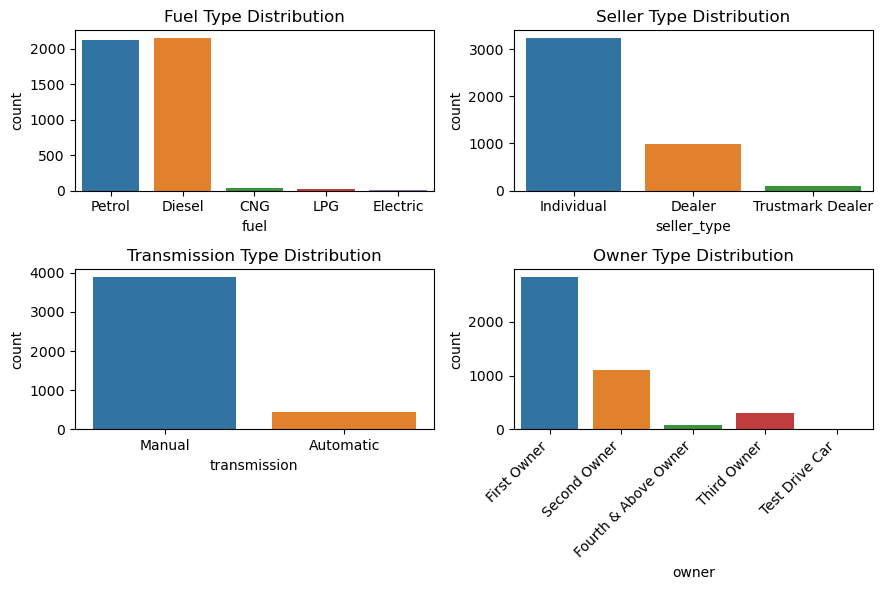

In [62]:
# Visualize the distribution of categorical variables
plt.figure(figsize=(9, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='fuel', data=df)
plt.title('Fuel Type Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='seller_type', data=df)
plt.title('Seller Type Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='transmission', data=df)
plt.title('Transmission Type Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='owner', data=df)
plt.title('Owner Type Distribution')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


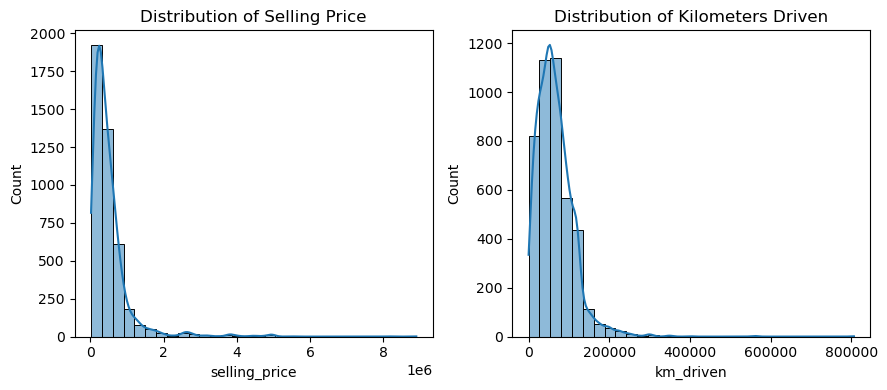

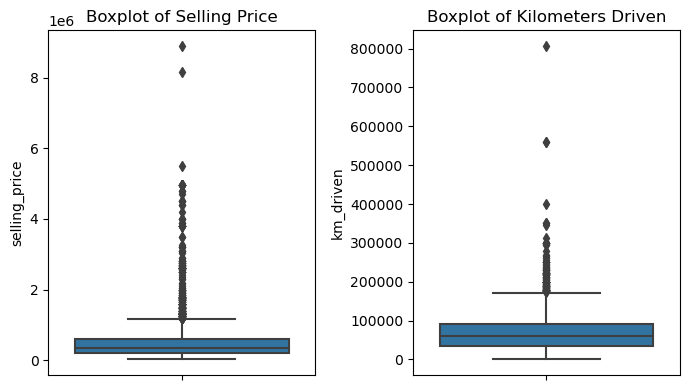

In [44]:
# Visualize the distribution of numerical variables
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')

plt.subplot(1, 2, 2)
sns.histplot(df['km_driven'], kde=True, bins=30)
plt.title('Distribution of Kilometers Driven')

plt.tight_layout()
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['selling_price'])
plt.title('Boxplot of Selling Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['km_driven'])
plt.title('Boxplot of Kilometers Driven')

plt.tight_layout()
plt.show()


In [48]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


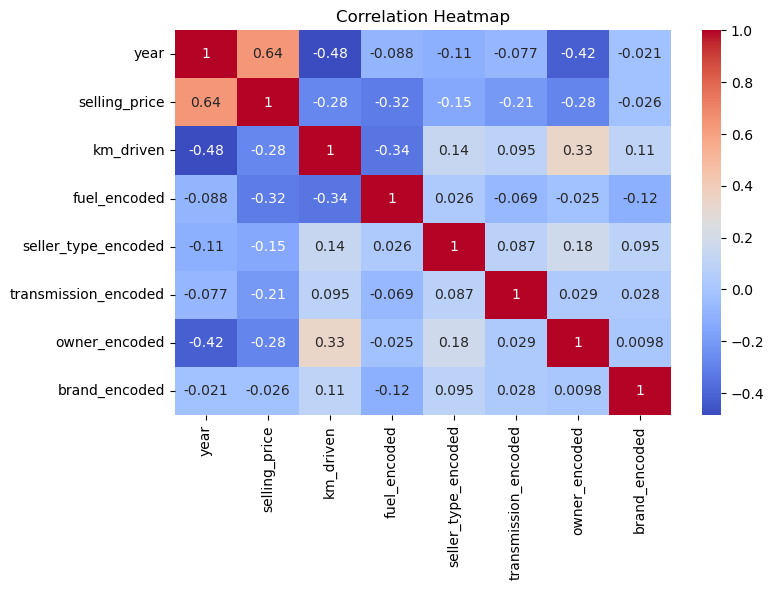

In [51]:
# Correlation matrix
plt.figure(figsize=(8, 5))
correlation_matrix =car_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


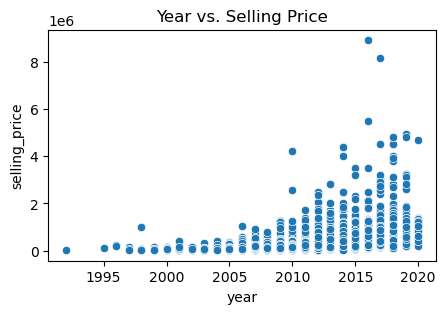

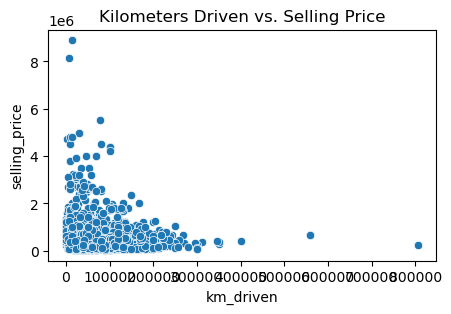

In [53]:
# Scatter plot to visualize the relationship between year and selling price
plt.figure(figsize=(5, 3))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs. Selling Price')
plt.show()

# Scatter plot to visualize the relationship between km_driven and selling price
plt.figure(figsize=(5, 3))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Kilometers Driven vs. Selling Price')
plt.show()


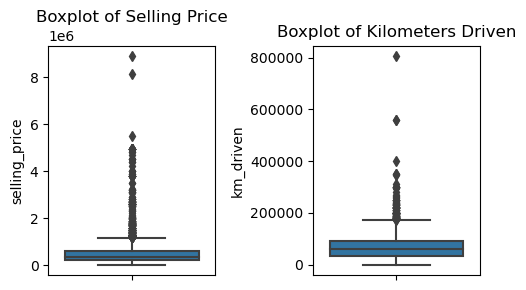

In [55]:
# Outlier detection using boxplot
plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['selling_price'])
plt.title('Boxplot of Selling Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['km_driven'])
plt.title('Boxplot of Kilometers Driven')

plt.tight_layout()
plt.show()


<font color="Mediumpurple">
<b>Insights from the Visualizations


<font color="RebeccaPurple">
Based on the visualizations and data analysis, you can draw several conclusions:<br><br>

Fuel Type- Understand which fuel types are most common in the dataset. For instance, Petrol & diesel might be the most common fuel type, indicating market trends or preferences.<br><br>
Seller Type and Transmission- Assess the distribution of seller types and transmission types (manual vs. automatic).<br><br>
Numerical Data Distribution- Analyze how car prices and kilometers driven are distributed. For example, you might observe that most cars are within a specific price range or that there are some extreme values in the kilometers driven, which could indicate outliers.<br><br>
Correlations- Check the correlation heatmap to identify any strong correlations between variables. For instance, the year might have a negative correlation with selling_price, indicating that older cars are typically cheaper.

<font color="Mediumpurple">
<b>Useful Resources



- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
